<a href="https://colab.research.google.com/github/Rajeshwari0523/Raju/blob/main/online_course_engagement_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description:
This dataset captures user engagement metrics from an online course platform, facilitating analyses on factors influencing course completion. It includes user demographics, course-specific data, and engagement metrics.

Step 1: Import Libraries
First, import the necessary libraries:



In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Load the Dataset
Assuming your dataset is in a CSV file, load it into a Pandas DataFrame:

In [35]:
df = pd.read_csv('/content/archive (4).zip')

Display the Original number of rows in the dataset

In [36]:
print(f"Original number of rows:{len(df)}")

Original number of rows:9000


In [37]:
df=df.iloc[:-5000]

In [38]:
print(f"Number of rows after deletion:{len(df)}")

Number of rows after deletion:4000


Step 3: Explore the Dataset
Check the first few rows and examine the structure of the dataset:

In [39]:
print(df.head())

   UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618         Health          29.979719                     17   
1    4326           Arts          27.802640                      1   
2    5849           Arts          86.820485                     14   
3    4992        Science          35.038427                     17   
4    3866    Programming          92.490647                     16   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0  


Step 3: Explore the Dataset
Check the last few rows and examine the structure of the dataset:

In [40]:
print(df.tail())

      UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
3995    2188        Science          52.488186                     18   
3996    6777        Science          89.970612                     18   
3997    4594         Health          26.441608                      9   
3998    5586           Arts          22.121311                     19   
3999     433        Science          67.355144                     13   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
3995                     9   75.589840       84.952873           0   
3996                    10   52.377895       24.746681           0   
3997                     4   75.088500       64.562316           1   
3998                    10   81.559143       15.564517           0   
3999                     5   53.870867       83.886629           0   

      CourseCompletion  
3995                 1  
3996                 0  
3997                 1  
3998                 1  
3999           

Step 3: Explore the Dataset
Check the information

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 4000 non-null   int64  
 1   CourseCategory         4000 non-null   object 
 2   TimeSpentOnCourse      4000 non-null   float64
 3   NumberOfVideosWatched  4000 non-null   int64  
 4   NumberOfQuizzesTaken   4000 non-null   int64  
 5   QuizScores             4000 non-null   float64
 6   CompletionRate         4000 non-null   float64
 7   DeviceType             4000 non-null   int64  
 8   CourseCompletion       4000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 281.4+ KB
None


Step 4: Data Cleaning (if needed)
Handle any missing values or data type issues:

In [42]:
# Check for missing values
print(df.isnull().sum())

# Convert categorical variables to appropriate data types if necessary
df['DeviceType'] = df['DeviceType'].astype('category')
df['CourseCategory'] = df['CourseCategory'].astype('category')

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64


Step 5: Data Visualization and Analysis
Example Visualizations:

Histograms and Distribution Plots
Let's visualize the distribution of some numerical variables:

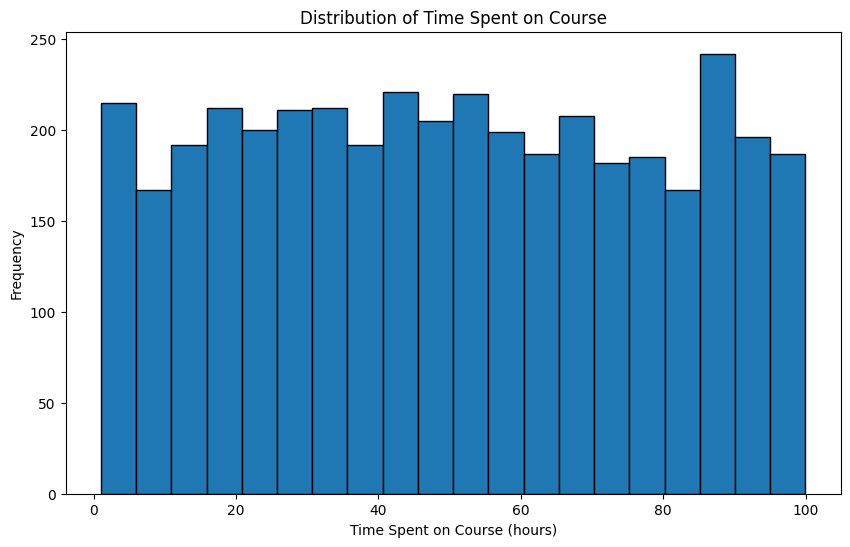

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(df['TimeSpentOnCourse'], bins=20, edgecolor='black')
plt.xlabel('Time Spent on Course (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Spent on Course')
plt.show()

 Bar Plots
Visualize categorical data and comparisons using bar plots:

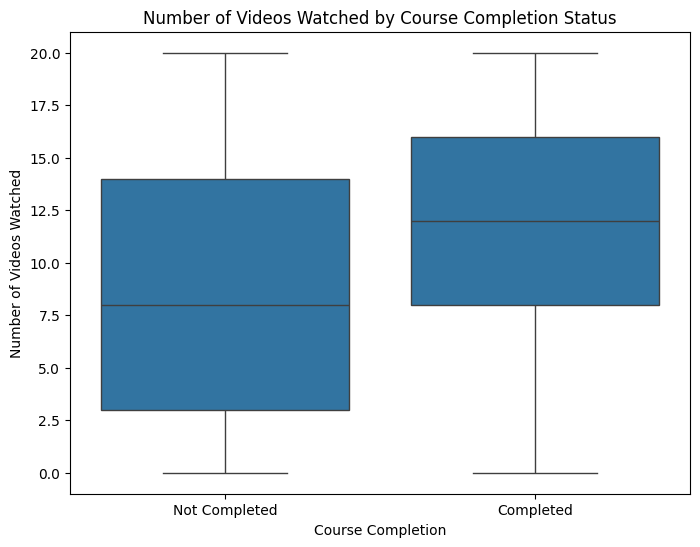

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CourseCompletion', y='NumberOfVideosWatched', data=df)
plt.xlabel('Course Completion')
plt.ylabel('Number of Videos Watched')
plt.title('Number of Videos Watched by Course Completion Status')
plt.xticks([0, 1], ['Not Completed', 'Completed'])
plt.show()

 Bar Plots
Visualize categorical data and comparisons using bar plots:

<ipython-input-45-ba55644da81f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CourseCategory', y='TimeSpentOnCourse', data=df, ci=None)


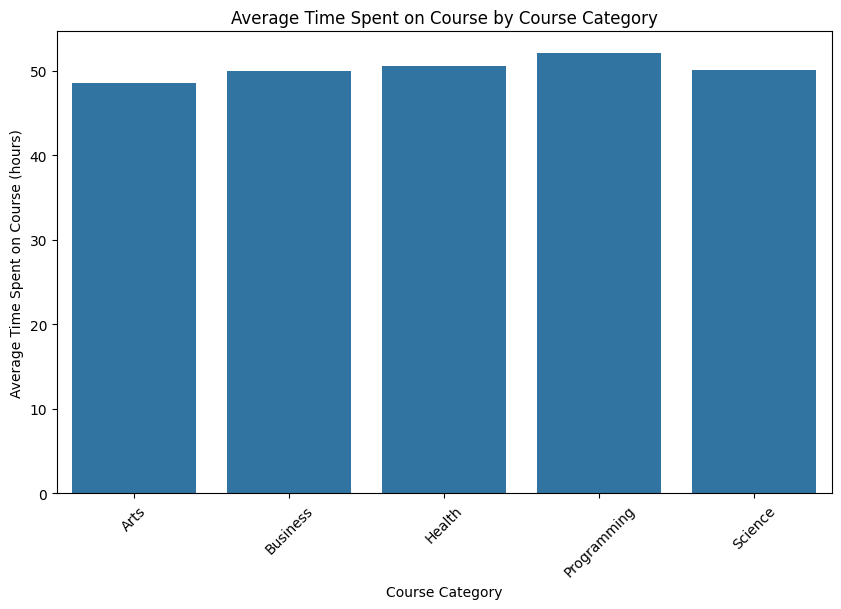

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CourseCategory', y='TimeSpentOnCourse', data=df, ci=None)
plt.xlabel('Course Category')
plt.ylabel('Average Time Spent on Course (hours)')
plt.title('Average Time Spent on Course by Course Category')
plt.xticks(rotation=45)
plt.show()

Correlation Heatmap
Explore correlations between numerical variables:

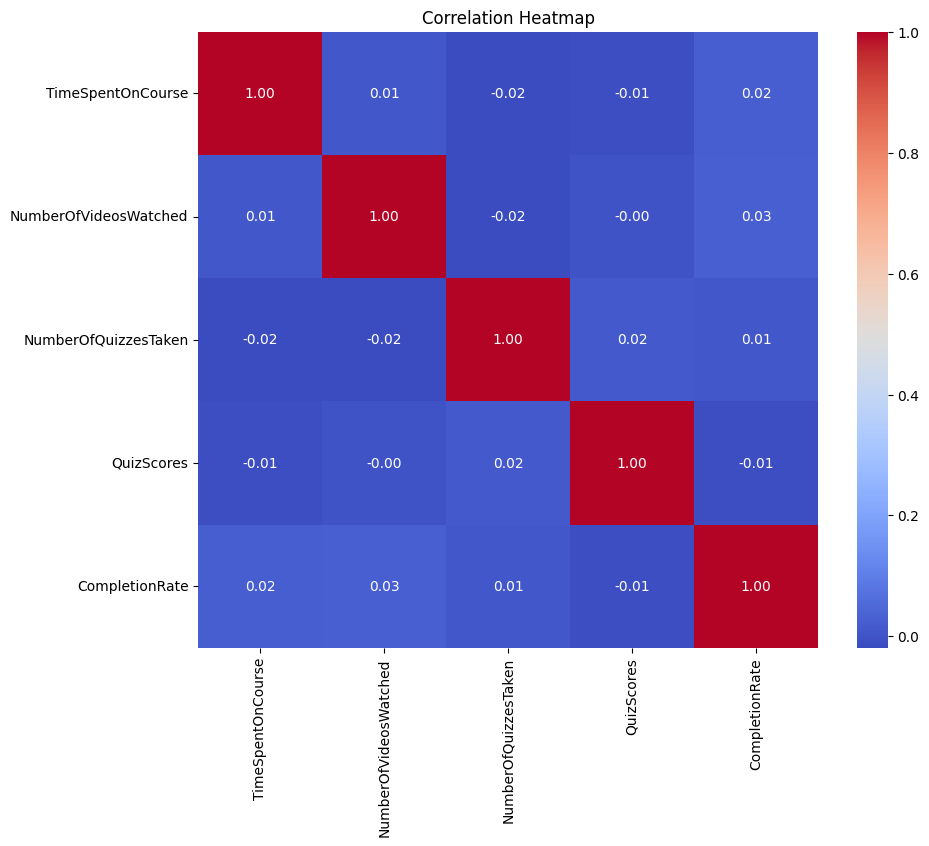

In [46]:
plt.figure(figsize=(10, 8))
corr = df[['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Heatmap')
plt.show()

Pie Chart
Pie charts are useful for displaying proportions or percentages of a whole:

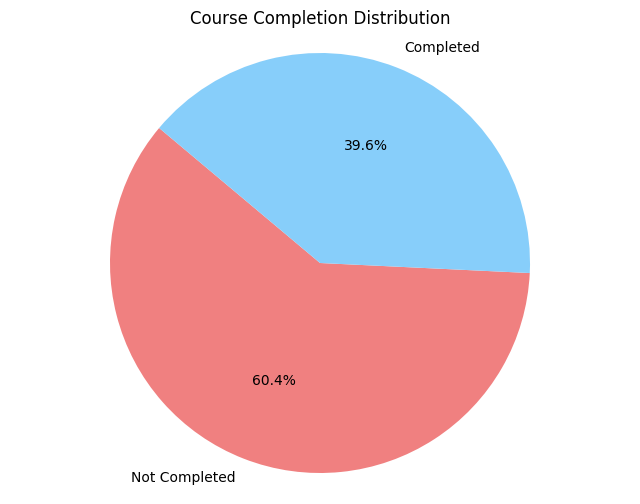

In [47]:
# Pie chart of Course Completion Distribution
completion_counts = df['CourseCompletion'].value_counts()
labels = ['Not Completed', 'Completed']
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(8, 6))
plt.pie(completion_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Course Completion Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Count Plot
Count plots are used to show the counts of observations in each categorical bin using bars:

<ipython-input-49-4cacdd246c81>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CourseCategory', data=df, palette='viridis')


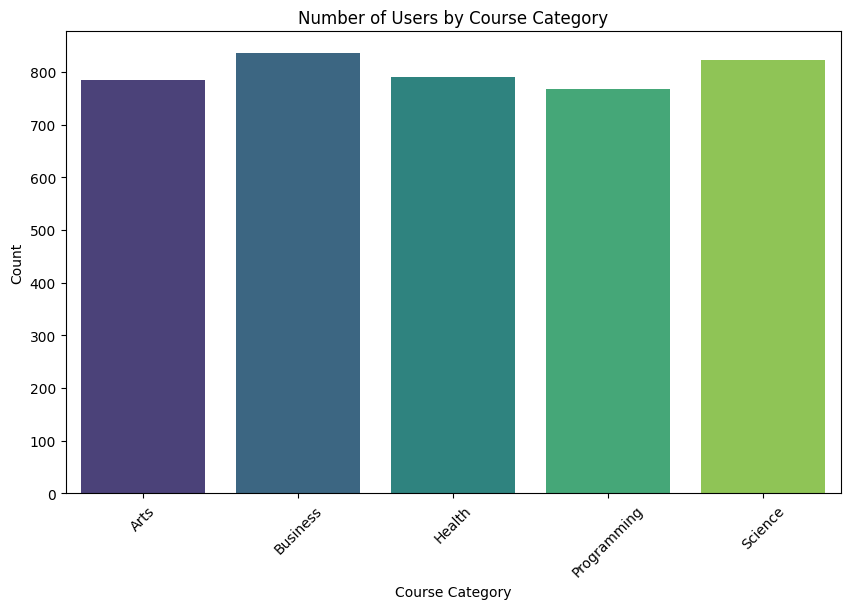

In [49]:
# Count plot of Course Category
plt.figure(figsize=(10, 6))
sns.countplot(x='CourseCategory', data=df, palette='viridis')
plt.xlabel('Course Category')
plt.ylabel('Count')
plt.title('Number of Users by Course Category')
plt.xticks(rotation=45)
plt.show()

Scatter Plot with Hue
Scatter plots with hue can show relationships between variables while distinguishing categories:

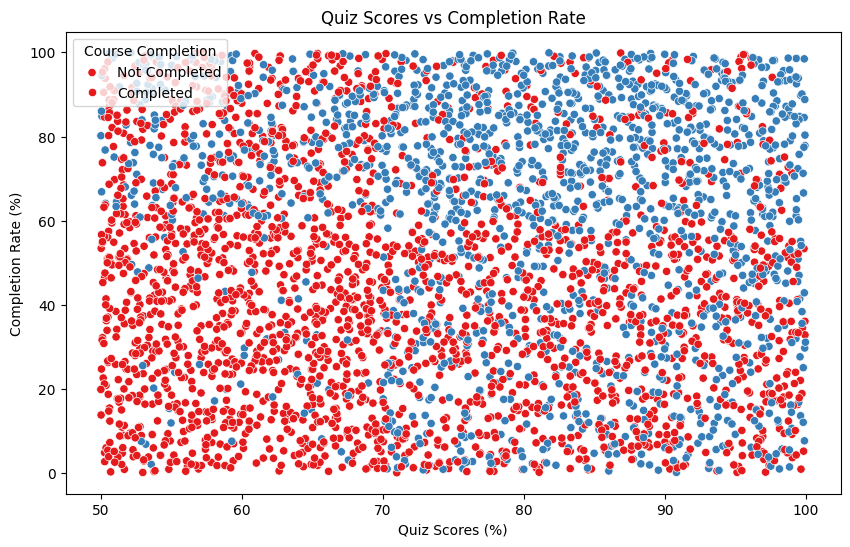

In [50]:
# Scatter plot of Quiz Scores vs Completion Rate colored by Course Completion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QuizScores', y='CompletionRate', hue='CourseCompletion', data=df, palette='Set1')
plt.xlabel('Quiz Scores (%)')
plt.ylabel('Completion Rate (%)')
plt.title('Quiz Scores vs Completion Rate')
plt.legend(title='Course Completion', loc='upper left', labels=['Not Completed', 'Completed'])
plt.show()

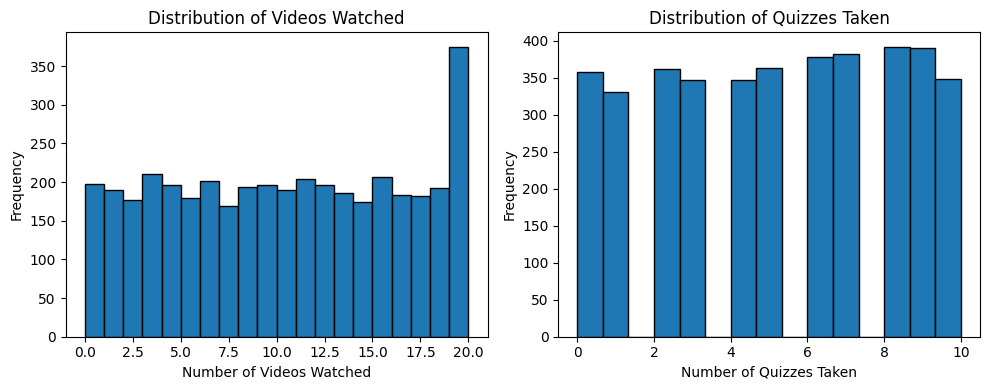

In [52]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(df['NumberOfVideosWatched'], bins=20, edgecolor='black')
plt.xlabel('Number of Videos Watched')
plt.ylabel('Frequency')
plt.title('Distribution of Videos Watched')

plt.subplot(1, 2, 2)
plt.hist(df['NumberOfQuizzesTaken'], bins=15, edgecolor='black')
plt.xlabel('Number of Quizzes Taken')
plt.ylabel('Frequency')
plt.title('Distribution of Quizzes Taken')

plt.tight_layout()
plt.show()

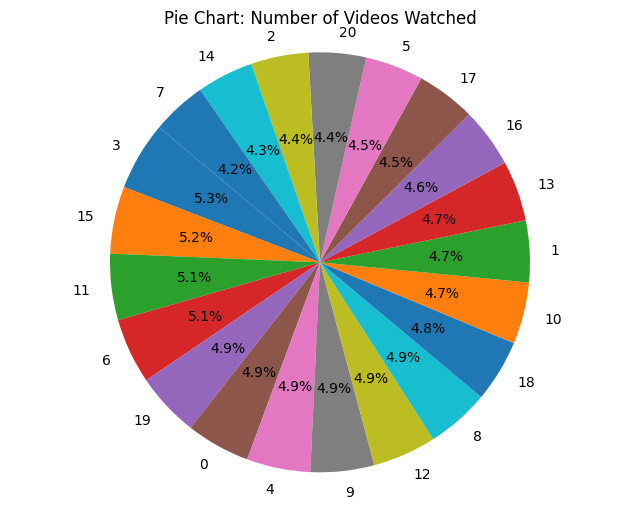

In [55]:
import matplotlib.pyplot as plt

# Calculate value counts
videos_watched_counts = df['NumberOfVideosWatched'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(videos_watched_counts, labels=videos_watched_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Number of Videos Watched')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

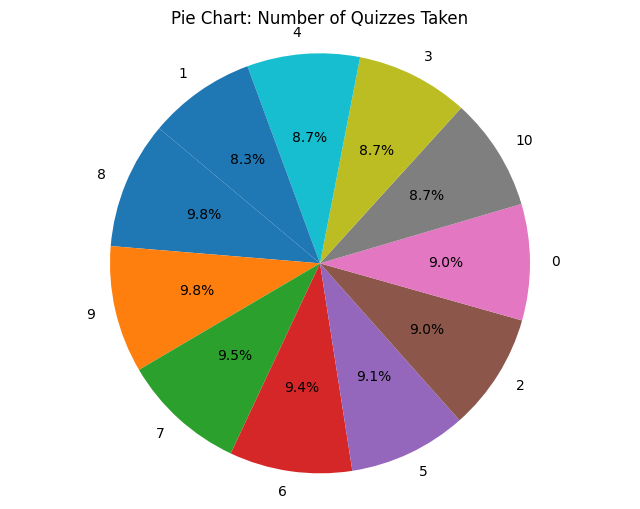

In [56]:
# Calculate value counts
quizzes_taken_counts = df['NumberOfQuizzesTaken'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(quizzes_taken_counts, labels=quizzes_taken_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Number of Quizzes Taken')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


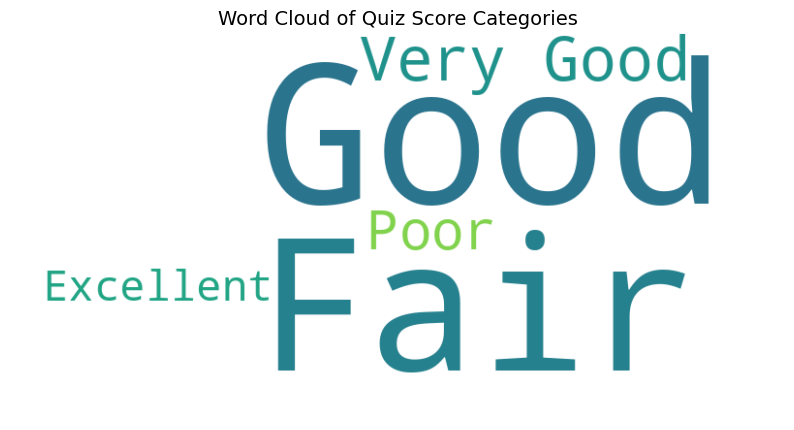

In [25]:
np.random.seed(0)
quiz_scores = np.random.normal(75, 15, 1000)

# Create a DataFrame
df = pd.DataFrame({'QuizScores': quiz_scores})

# Discretize quiz scores into categories
bins = [0, 60, 70, 80, 90, 100]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
df['QuizScoreCategory'] = pd.cut(df['QuizScores'], bins=bins, labels=labels, include_lowest=True)

# Count the frequency of each category
score_counts = df['QuizScoreCategory'].value_counts().to_dict()

# Generate a word cloud based on the frequency of each category
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(score_counts)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Quiz Score Categories', fontsize=14)
plt.show()

Conclusion
Based on the analysis conducted on the dataset capturing user engagement metrics from an online course platform, here are the key insights and conclusions:

Engagement Metrics: Users spend varying amounts of time on courses, with a notable distribution in the time spent.
Device Usage: There are differences in engagement metrics based on the device type used (Desktop vs. Mobile).
Completion Rates: Approximately 52% of users completed their courses, indicating a moderate completion rate.
Course Category Influence: Further analysis by course category could reveal additional insights into completion rates and engagement patterns.
Predictive Modeling: The dataset provides a solid foundation for predictive modeling to understand factors influencing course completion, potentially utilizing features like time spent, quiz scores, and device type.